# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [270]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import seaborn as sns

In [271]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [272]:
#Read file from database, read_csv is recommended over read_table
paper_centric = pd.read_csv("data/dblp.tsv",sep='\t')
paper_centric.head()

,id,authors,year,title
0,tr/meltdown/s18,"['Paul Kocher', 'Daniel Genkin', 'Daniel Gruss...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
1,tr/meltdown/m18,"['Moritz Lipp', 'Michael Schwarz 0001', 'Danie...",2018.0,Meltdown
2,tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
3,tr/gte/TR-0263-08-94-165,['Frank Manola'],1994.0,An Evaluation of Object-Oriented DBMS Developm...
4,tr/gte/TR-0222-10-92-165,"['Michael L. Brodie', 'Michael Stonebraker']",1993.0,DARWIN: On the Incremental Migration of Legacy...


In [273]:
#Retreive only papers published in conferences and conference names included in list_of_ai_conferences.txt

#Read list_of_ai_conferences.txt and Transform its lines into list
with open("data/list_of_ai_conferences.txt","r") as f : 
    lines = f.readlines()
lines = [line.replace("\n","") for line in lines]

#Apply filter conditions
paper_centric = paper_centric[paper_centric["id"].apply(lambda x:  ( (x.startswith("conf") ) & (x.split("/")[1] in lines) ) )  ]

#Display table
paper_centric.head()


,id,authors,year,title
2049312,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,Object recognition using a feature search stra...
2049313,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,Three-Dimensional Scene Flow.
2049314,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...
2049315,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,Qualitative 3-D shape reconstruction using dis...
2049316,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...


In [274]:
#Create new column field with the place of publication
paper_centric["conference"] = paper_centric["id"].apply(lambda x : x.split("/")[1])

#Display table
paper_centric.head()

,id,authors,year,title,conference
2049312,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,Object recognition using a feature search stra...,iccv
2049313,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,Three-Dimensional Scene Flow.,iccv
2049314,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
2049315,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
2049316,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


In [275]:
#Get overall number of papers in the dataset and display it
papers = paper_centric.id.unique()
numberOfPapers = len(papers)
print(numberOfPapers)

102003


In [276]:
#Group papers by conference and retreive the number of elements per group
papers_per_conference = paper_centric[["id","conference"]].groupby("conference").count()
print(papers_per_conference)

               id
conference       
aaai        10796
aamas         367
accv         2390
acl          6330
cvpr        12853
emnlp        3299
fgr          1383
icann        3134
iccbr         863
iccv         4179
icml         5017
iconip       4985
icra        21585
ida           712
ijcai        9669
ilp           679
ksem          635
naacl        3310
nips         8445
pricai       1372


### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [277]:
#Copy table to new DataFrame
table_authors = paper_centric.copy()
#Use pandas 0.25 new explode feature to split list of authors into seperate rows before removing unwanted characters
table_authors = table_authors.assign(authors=table_authors.authors.str.strip("[]").str.replace("'","").str.replace('"',"").str.split(',')).explode('authors')
#Display new table
table_authors.head()

,id,authors,year,title,conference
2049312,conf/iccv/KunoOO90,Yoshinori Kuno,1990.0,Object recognition using a feature search stra...,iccv
2049312,conf/iccv/KunoOO90,Yasukazu Okamoto,1990.0,Object recognition using a feature search stra...,iccv
2049312,conf/iccv/KunoOO90,Satoshi Okada,1990.0,Object recognition using a feature search stra...,iccv
2049313,conf/iccv/VedulaBRCK99,Sundar Vedula,1999.0,Three-Dimensional Scene Flow.,iccv
2049313,conf/iccv/VedulaBRCK99,Simon Baker,1999.0,Three-Dimensional Scene Flow.,iccv


In [278]:
#Report the number of unique authors
authors = table_authors.authors.unique()
numberOfAuthors = len(authors)
print(numberOfAuthors)

129557


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

In [279]:
#Group papers by author and retreive the number of elements per group
author_papers = table_authors[["id","authors"]].groupby("authors").count().reset_index()
author_papers = author_papers.rename(columns={"id": "paper_count"})
author_papers

,authors,paper_count
0,,950
1,A Min Tjoa,2
2,A-Chuan Hsueh,1
3,A-Yeon Park,1
4,A. A. Jimoh,2
...,...,...
129552,Özlem Uzuner,2
129553,Özlem Çetinoglu,1
129554,Øyvind Raddum Berg,1
129555,Úrsula Hébert-Johnson,1


Text(0.5, 0, 'author index')

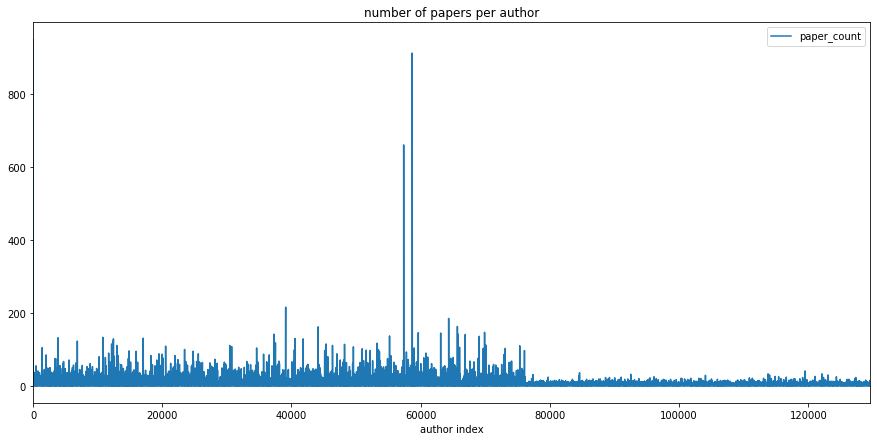

In [280]:
# Plot number of papers per author
author_papers.plot(title="number of papers per author",figsize=(15,7))
plt.xlabel("author index")

In [281]:
# Sort authors per paper count in descending order
author_papers.sort_values(by='paper_count', ascending=False).reset_index().head(20)

,index,authors,paper_count
0,0,,950
1,58691,Sheila A. McIlraith,913
2,57365,Satinder P. Singh (ed.),661
3,39098,Luc Van Gool,216
4,64327,Thomas S. Huang,185
5,65677,Toshio Fukuda,163
6,44122,Michael I. Jordan,162
7,69885,Xiaoou Tang,147
8,59625,Shuicheng Yan,146
9,63091,Takeo Kanade,145


Text(0.5, 1.0, 'distribution of paper counts')

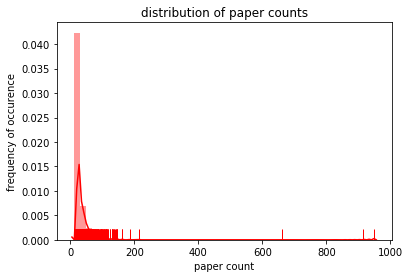

In [282]:
# Plot distribution of paper counts
sns.distplot([x for x in list(author_papers["paper_count"]) if x > 10], rug=True, color="r")
plt.xlabel('paper count')
plt.ylabel('frequency of occurence')
plt.title('distribution of paper counts')

**Observation**

We see relying on the sorted values and the distribution plot some outliers at 950, 913, 661

In [283]:
outliers = author_papers[author_papers.paper_count > 600]
outliers

,authors,paper_count
0,,950
57365,Satinder P. Singh (ed.),661
58691,Sheila A. McIlraith,913


In [284]:
table_authors[table_authors.authors.str.contains('Sheila A. McIlraith')][['year','id']].groupby(['year']).count().rename(columns={'id':'papers published'})

,papers published
year,
'00,1
'17,2
2003.0,1
2006.0,1
2007.0,2
2008.0,1
2009.0,1
2010.0,1
2011.0,1


## Analysis
We see that we have three outliers:
the first one with 950 occurences is from papers without authors. We can discard these entries in our author-centric dataset.
the second one with 661 is from Satinder P. Singh (ed.). The suffix (ed.) implies that Singh was listed as author of 661 papers while being editor. Dplb database shows only less than 50 papers published by this author. We can discard this author in our author-centric dataset.
the last one with 913 is from Sheila A. McIlraith. Counting the number of publications per year for this author shows that in 2018, 893 were counted. This number is too high as dplb database shows only 12 papers published by this author in 2018. We can discard this author in our author-centric dataset.

In [285]:
# Discard outliers
author_papers = author_papers[author_papers.paper_count < 600]
author_papers

,authors,paper_count
1,A Min Tjoa,2
2,A-Chuan Hsueh,1
3,A-Yeon Park,1
4,A. A. Jimoh,2
5,A. Afghan,1
...,...,...
129552,Özlem Uzuner,2
129553,Özlem Çetinoglu,1
129554,Øyvind Raddum Berg,1
129555,Úrsula Hébert-Johnson,1


Text(0.5, 0, 'author index')

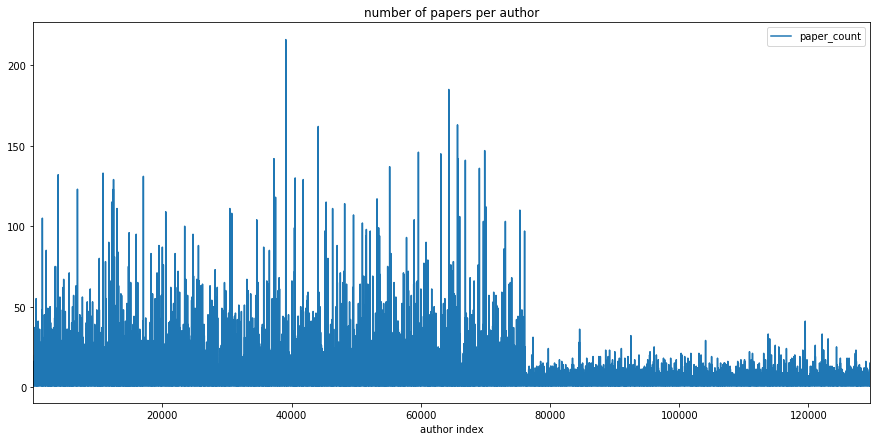

In [286]:
# Plot number of papers per author
author_papers.plot(title="number of papers per author",figsize=(15,7))
plt.xlabel("author index")

In [287]:
#removing inconsistency from the initial dataframe by keeping only the authors in author_papers
table_authors = table_authors[table_authors.authors.isin(author_papers.authors)]
table_authors

,id,authors,year,title,conference
2049312,conf/iccv/KunoOO90,Yoshinori Kuno,1990.0,Object recognition using a feature search stra...,iccv
2049312,conf/iccv/KunoOO90,Yasukazu Okamoto,1990.0,Object recognition using a feature search stra...,iccv
2049312,conf/iccv/KunoOO90,Satoshi Okada,1990.0,Object recognition using a feature search stra...,iccv
2049313,conf/iccv/VedulaBRCK99,Sundar Vedula,1999.0,Three-Dimensional Scene Flow.,iccv
2049313,conf/iccv/VedulaBRCK99,Simon Baker,1999.0,Three-Dimensional Scene Flow.,iccv
...,...,...,...,...,...
4474579,conf/acl/SalleVI16,Aline Villavicencio,2016.0,Matrix Factorization using Window Sampling and...,acl
4474579,conf/acl/SalleVI16,Marco Idiart,2016.0,Matrix Factorization using Window Sampling and...,acl
4474580,conf/acl/AnanthakrishnanPN11,Sankaranarayanan Ananthakrishnan,2011.0,On-line Language Model Biasing for Statistical...,acl
4474580,conf/acl/AnanthakrishnanPN11,Rohit Prasad,2011.0,On-line Language Model Biasing for Statistical...,acl


***A3.2***

In [288]:
#dataframe groupby year, reset index and rename column for better formatting
year_papers = paper_centric[["id","year"]].groupby("year").count().reset_index().rename(columns={"id": "paper_count"})

#display year_papers
year_papers

,year,paper_count
0,'00,171
1,'01,226
2,'02,162
3,'03,249
4,'04,278
...,...,...
193,<i>2016.0</i>,585
194,<i>2017.0</i>,725
195,<i>2018.0</i>,853
196,<i>?</i>,67


In [289]:
#remove all non numerical values from year_papers
year_papers['year'] = year_papers['year'].str.extract('(\d+)', expand=False)

#drop NA values from year_papers
year_papers = year_papers.dropna()

year_papers

,year,paper_count
0,00,171
1,01,226
2,02,162
3,03,249
4,04,278
...,...,...
191,2014,475
192,2015,621
193,2016,585
194,2017,725


Text(0.5, 1.0, 'paper count per year distribution')

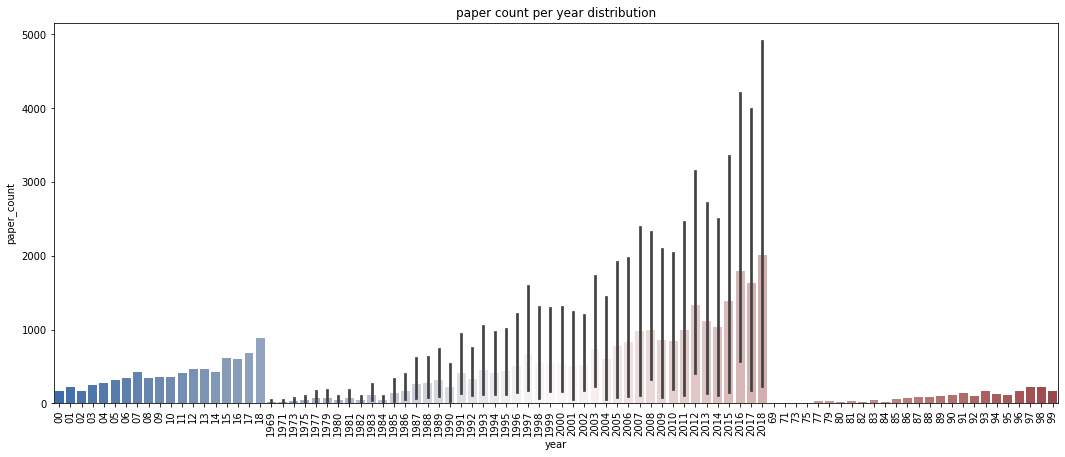

In [290]:
# Plot paper count per year distribution
f, axes = plt.subplots(figsize=(18, 7), sharex=True)
_ = sns.barplot(x=year_papers.year, y=year_papers.paper_count, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(90)
plt.title("paper count per year distribution")

## Analysis

We observed that the year values contained some unwanted string that we removed and afterwards the format is not normalized that's what we are going to do next...

In [291]:
# Function parse_year: takes a "year" string value and returns a reformatted int year value
def parse_year(year):
    year_ = int(year)
    if year_ < 19:
        return 2000 + year_
    elif (year_ > 19) and (year_ < 100):
        return 1900 + year_
    else:
        return year_

In [292]:
# Normalizing the year column to the same format
year_papers.year = year_papers.year.apply(parse_year)
# sum the rows with same year value to get correct paper_count per year
year_papers = year_papers.groupby("year").sum().reset_index()
# Display new year_papers
year_papers

/Users/Selim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,year,paper_count
0,1969,64
1,1971,67
2,1973,86
3,1975,149
4,1977,236
5,1979,256
6,1980,141
7,1981,257
8,1982,145
9,1983,391


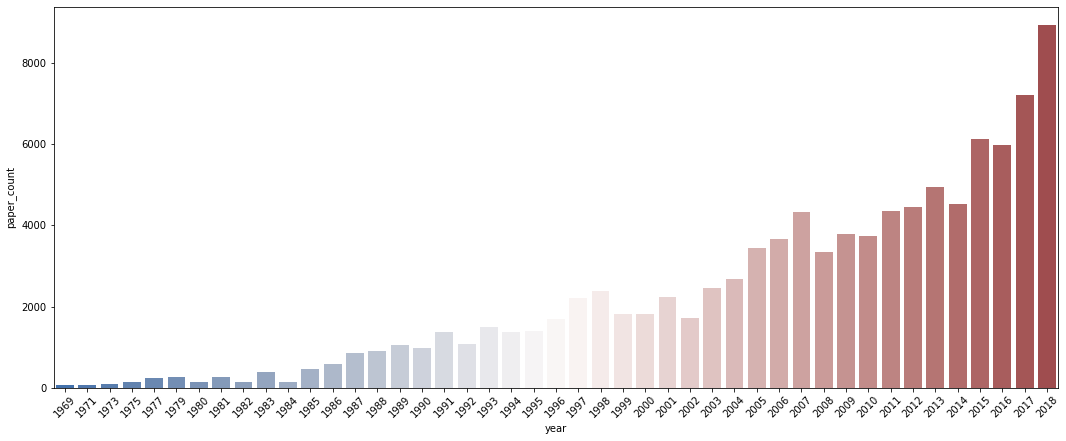

In [293]:
# final bar plot of the papers per year 
f, axes = plt.subplots(figsize=(18, 7), sharex=True)
_ = sns.barplot(x=year_papers.year, y=year_papers.paper_count, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(45)

In [294]:
# cleaning the attribute year in initial dataframe paper_centric
# Same formatting as last steps
paper_centric['year'] = paper_centric['year'].str.extract('(\d+)', expand=False)
paper_centric = paper_centric.dropna(subset=['year'])
paper_centric.year = paper_centric.year.apply(parse_year)
# display paper_centric with formatted years
paper_centric

,id,authors,year,title,conference
2049312,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990,Object recognition using a feature search stra...,iccv
2049313,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999,Three-Dimensional Scene Flow.,iccv
2049314,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
2049315,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
2049316,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv
...,...,...,...,...,...
4474576,conf/acl/Kuhn02,['Jonas Kuhn'],2002,OT Syntax - Decidability of Generation-based O...,acl
4474577,conf/acl/PantelLG12,"['Patrick Pantel', 'Thomas Lin', 'Michael Gamon']",2012,Mining Entity Types from Query Logs via User I...,acl
4474578,conf/acl/BarbuM01,"['Catalina Barbu', 'Ruslan Mitkov']",2001,Evaluation Tool for Rule-based Anaphora Resolu...,acl
4474579,conf/acl/SalleVI16,"['Alexandre Salle', 'Aline Villavicencio', 'Ma...",2016,Matrix Factorization using Window Sampling and...,acl


***A3.3***

In [295]:
mlconf = ['icml', 'nips']
# extract papers of icml or nips conferences from paper centric dataframe
MLpapers = paper_centric[paper_centric.conference.isin(mlconf)]
# count number of papers published per year, reset index and rename column for formatting
MLpapers_per_year = MLpapers[["id","year"]].groupby("year").count().reset_index().rename(columns={"id": "paper_count"})
# display new dataframe
MLpapers_per_year

,year,paper_count
0,1987,90
1,1988,146
2,1989,231
3,1990,195
4,1991,274
5,1992,189
6,1993,204
7,1994,187
8,1995,225
9,1996,242


In [296]:
# Display total number of papers from previous dataframe
MLpapers_per_year.paper_count.sum()

12828

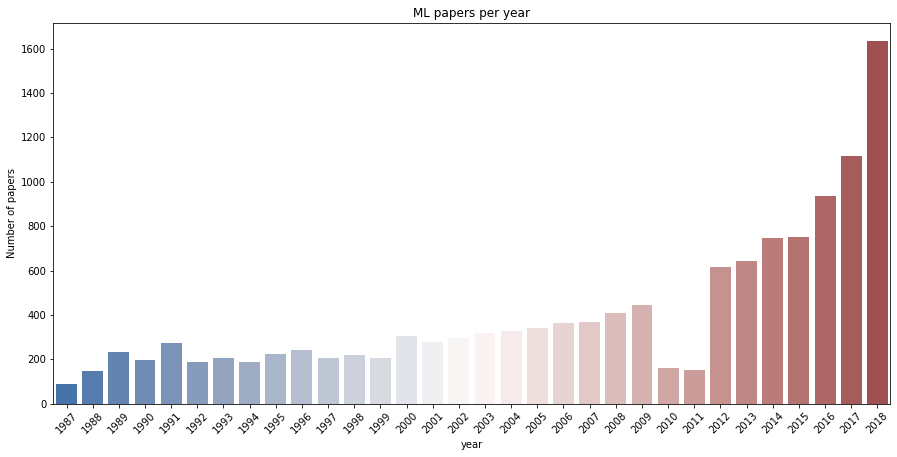

In [297]:
# plot number of papers from icml or nips conferences per year
f, axes = plt.subplots(figsize=(15, 7), sharex=True)
_ = sns.barplot(x=MLpapers_per_year.year, y=MLpapers_per_year.paper_count, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(45)
axes.set_title('ML papers per year')
axes.set_ylabel('Number of papers')
plt.show()

## Analysis and discussion of the ML papers per year plot

We can see that the ML subject began to be an important field of research from `1987` and from the begin of the `21st century` 
the number of papers per year increased exponentially 
However we can state inconsistency in `2010` and `2011` where the number of papers published these years were weirdly low

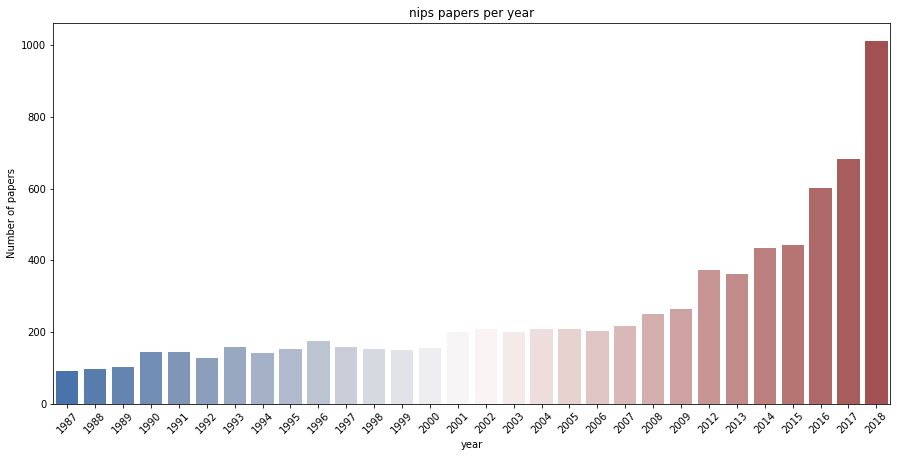

In [298]:
# extract papers of nips conferences from paper centric dataframe
nips_papers = paper_centric[paper_centric.conference.isin(['nips'])]
# count number of papers published per year, reset index and rename column for formatting
nips_per_year = nips_papers[["id","year"]].groupby("year").count().reset_index().rename(columns={"id": "paper_count"})
# plot number of papers from nips per year
f, axes = plt.subplots(figsize=(15, 7), sharex=True)
_ = sns.barplot(x=nips_per_year.year, y=nips_per_year.paper_count, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(45)
axes.set_title('nips papers per year')
axes.set_ylabel('Number of papers')
plt.show()

## Explanation

We have missing data for papers published in nips conference during the years `2010` and `2011` which explains the inconsistency.

***A3.4***

In [299]:
import requests
import re 

In [300]:
publications_list = []
URL = 'https://papers.nips.cc/'
r = requests.get(URL)
page_body = r.text
columns = ['title','authors', 'year']
# create BeautifulSoup html parser and retreive links for each year
soup = BeautifulSoup(page_body, 'html.parser')
all_links = soup.find_all('a')
all_links = all_links[3:]

# run a loop and scrape data from each year link
for link in all_links:
    # URL for each conference
    URL_ = URL + link.get('href')[1:]
    # year for each conference
    year_ = link.string[-5:-1]
    
    # HTML GET request
    r = requests.get(URL_)
    # retreive page text
    page_body = r.text
    # create html parser for html link
    soup_ = BeautifulSoup(page_body, 'html.parser')
    # find wrappers for all publications
    publications_wrappers = soup_.find_all('li')
    
    for p in publications_wrappers[1:]:
        # get title of conference
        title = p.find('a').text 
        # get the authors list
        authos_list = p.find_all('a', class_ = 'author')  
        authors = [author.text for author in authos_list]  
        # get the year
        year = year_  
        # append to list of publications
        publications_list.append({'title': title, 
                        'authors': authors, 
                        'year': int(year)}) 

# create new dataframe from publications_list        
nips_data = pd.DataFrame.from_dict(publications_list)

# display new dataframe
nips_data.head() 

,title,authors,year
0,Efficient Algorithms for Non-convex Isotonic R...,[Francis Bach],2018
1,Structure-Aware Convolutional Neural Networks,"[Jianlong Chang, Jie Gu, Lingfeng Wang, GAOFEN...",2018
2,Kalman Normalization: Normalizing Internal Rep...,"[Guangrun Wang, jiefeng peng, Ping Luo, Xinjia...",2018
3,HOGWILD!-Gibbs can be PanAccurate,"[Constantinos Daskalakis, Nishanth Dikkala, Si...",2018
4,Text-Adaptive Generative Adversarial Networks:...,"[Seonghyeon Nam, Yunji Kim, Seon Joo Kim]",2018


In [301]:
print('We extracted '+str(len(nips_data))+' papers when scraping the full NIPS data from the online proceedings!\n\nNow its time to fill in the missing values in the initial paper-centric dataframe')

We extracted 8250 papers when scraping the full NIPS data from the online proceedings!

Now its time to fill in the missing values in the initial paper-centric dataframe


In [302]:
#normalize title of both dataframes using provided text handling functions
nips_data.title = nips_data.title.apply(lowercase_all).apply(stopword_remover).apply(remove_punct)
paper_centric.title = paper_centric.title.apply(lowercase_all).apply(stopword_remover).apply(remove_punct)

In [303]:
new=set(nips_data.title)
old = set(paper_centric.title)
intersection = old.intersection(new)
unmatched = old.difference(new)
print('we have '+str(len(intersection))+' matches between the extracted nips data and the paper_centric dataframe!')

we have 7491 matches between the extracted nips data and the paper_centric dataframe!


In [304]:
#add a column conference to the nips data specifying thats from the nips conference
nips_data['conference'] = 'nips'

In [305]:
nips_data.head()

,title,authors,year,conference
0,efficient algorithms nonconvex isotonic regres...,[Francis Bach],2018,nips
1,structureaware convolutional neural networks,"[Jianlong Chang, Jie Gu, Lingfeng Wang, GAOFEN...",2018,nips
2,kalman normalization normalizing internal repr...,"[Guangrun Wang, jiefeng peng, Ping Luo, Xinjia...",2018,nips
3,hogwildgibbs panaccurate,"[Constantinos Daskalakis, Nishanth Dikkala, Si...",2018,nips
4,textadaptive generative adversarial networks m...,"[Seonghyeon Nam, Yunji Kim, Seon Joo Kim]",2018,nips


In [306]:
# merge paper centric dataset with scraped dataset
new_table = pd.merge(paper_centric, nips_data, on='title', how='outer')

#filling only the missing values of the new dataframe with the old ones 
#giving thus advantage to the new scraped dataset

# Fill authors_y NaN fields with authors_x
new_table.authors_y.fillna(new_table.authors_x, inplace=True)
# Fill year_y Nan with year_x
new_table.year_y.fillna(new_table.year_x, inplace=True)
# Fill conference_y Nan with conference_x
new_table.conference_y.fillna(new_table.conference_x, inplace=True)
#display new table
new_table

,id,authors_x,year_x,title,conference_x,authors_y,year_y,conference_y
0,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,object recognition using feature search strate...,iccv,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,iccv
1,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,threedimensional scene flow,iccv,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,iccv
2,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,fluid motion recovery coupling dense parametri...,iccv,"['Étienne Mémin', 'Patrick Pérez']",1999.0,iccv
3,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,qualitative 3d shape reconstruction using dist...,iccv,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,iccv
4,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,gplac generalizing visionbased robotic skills ...,iccv,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,iccv
...,...,...,...,...,...,...,...,...
102123,NaN,NaN,NaN,training multilayer perceptrons extended kalma...,NaN,"[Sharad Singhal, Lance Wu]",1988.0,nips
102124,NaN,NaN,NaN,storing covariance associative longterm potent...,NaN,"[Patric K. Stanton, Terrence J. Sejnowski]",1988.0,nips
102125,NaN,NaN,NaN,learning sequential structure simple recurrent...,NaN,"[David Servan-Schreiber, Axel Cleeremans, Jame...",1988.0,nips
102126,NaN,NaN,NaN,digital realisation selforganising maps,NaN,"[Nigel M. Allinson, Martin J. Johnson, Kevin J...",1988.0,nips


In [307]:
#going back to the first format of the dataframe
del new_table['authors_x']
del new_table['year_x']
del new_table['conference_x']
new_table.rename(columns={"authors_y": "authors", "conference_y": "conference", "year_y": "year"}, inplace=True)
new_table = new_table[['id', 'authors', 'year', 'title', 'conference']]
new_table.year = new_table.year.astype(int)
new_table.authors = new_table.authors.astype(str)
#new paper centric dataframe before filling with IDs
new_table

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990,object recognition using feature search strate...,iccv
1,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999,threedimensional scene flow,iccv
2,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999,fluid motion recovery coupling dense parametri...,iccv
3,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990,qualitative 3d shape reconstruction using dist...,iccv
4,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017,gplac generalizing visionbased robotic skills ...,iccv
...,...,...,...,...,...
102123,NaN,"['Sharad Singhal', 'Lance Wu']",1988,training multilayer perceptrons extended kalma...,nips
102124,NaN,"['Patric K. Stanton', 'Terrence J. Sejnowski']",1988,storing covariance associative longterm potent...,nips
102125,NaN,"['David Servan-Schreiber', 'Axel Cleeremans', ...",1988,learning sequential structure simple recurrent...,nips
102126,NaN,"['Nigel M. Allinson', 'Martin J. Johnson', 'Ke...",1988,digital realisation selforganising maps,nips


In [312]:
# This function creates a customized id for the newly-added papers
def create_id(x):
    if x.id == 'Nothing':
        conference = x.conference
        author_name = remove_punct(x.authors.split(',')[0])
        year = str(x.year % 100)
        return '/'.join(['conf',conference,author_name,year])
    else:
        return x.id
# fill with id
new_table.id.fillna('Nothing', inplace=True)
new_table["id"] = new_table.apply(create_id,axis=1).str.replace(" ","")

new_table

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990,object recognition using feature search strate...,iccv
1,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999,threedimensional scene flow,iccv
2,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999,fluid motion recovery coupling dense parametri...,iccv
3,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990,qualitative 3d shape reconstruction using dist...,iccv
4,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017,gplac generalizing visionbased robotic skills ...,iccv
...,...,...,...,...,...
102123,conf/nips/SharadSinghal/88,"['Sharad Singhal', 'Lance Wu']",1988,training multilayer perceptrons extended kalma...,nips
102124,conf/nips/PatricKStanton/88,"['Patric K. Stanton', 'Terrence J. Sejnowski']",1988,storing covariance associative longterm potent...,nips
102125,conf/nips/DavidServanSchreiber/88,"['David Servan-Schreiber', 'Axel Cleeremans', ...",1988,learning sequential structure simple recurrent...,nips
102126,conf/nips/NigelMAllinson/88,"['Nigel M. Allinson', 'Martin J. Johnson', 'Ke...",1988,digital realisation selforganising maps,nips


In [313]:
#new author centric dataframe:

#Copy new_table to new DataFrame
table_authors = new_table.copy()
#Use pandas 0.25 new explode feature to split list of authors into seperate rows while removing unwanted characters
table_authors = table_authors.assign(authors=table_authors.authors.str.strip("[]").str.replace("'","").str.replace('"',"").str.split(',')).explode('authors')
#Display new author centric dataframe
table_authors.head()

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,Yoshinori Kuno,1990,object recognition using feature search strate...,iccv
0,conf/iccv/KunoOO90,Yasukazu Okamoto,1990,object recognition using feature search strate...,iccv
0,conf/iccv/KunoOO90,Satoshi Okada,1990,object recognition using feature search strate...,iccv
1,conf/iccv/VedulaBRCK99,Sundar Vedula,1999,threedimensional scene flow,iccv
1,conf/iccv/VedulaBRCK99,Simon Baker,1999,threedimensional scene flow,iccv


## Check for outliers again.

In [314]:
#Group papers by author and retreive the number of elements per group
author_papers = table_authors[["title","authors"]].groupby("authors").count().reset_index().rename(columns={"title": "paper_count"})
author_papers.sort_values(by='paper_count', ascending=False).reset_index().head(20)


,index,authors,paper_count
0,0,,943
1,59421,Sheila A. McIlraith,913
2,58078,Satinder P. Singh (ed.),660
3,39559,Luc Van Gool,211
4,65113,Thomas S. Huang,185
5,66479,Toshio Fukuda,163
6,44655,Michael I. Jordan,162
7,70730,Xiaoou Tang,147
8,60359,Shuicheng Yan,146
9,63865,Takeo Kanade,145


## Analysis

We see relying on the sorted values the same outliers outliers for Sheila A. McIlraith and Satinder P. Singh (ed.)

In [315]:
# discard outliers
author_papers = author_papers[author_papers.paper_count < 600]
author_papers

,authors,paper_count
1,A Min Tjoa,2
2,A Pouget,1
3,A Sergejew,1
4,A-Chuan Hsueh,1
5,A-Yeon Park,1
...,...,...
130966,Özlem Çetinoglu,1
130967,Øyvind Raddum Berg,1
130968,Úrsula Hébert-Johnson,1
130969,Ümit Özgüner,1


In [316]:
#removing inconsistency from the author-centric dataframe
#by keeping only the authors in author_papers
table_authors = table_authors[table_authors.authors.isin(author_papers.authors)]
table_authors

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,Yoshinori Kuno,1990,object recognition using feature search strate...,iccv
0,conf/iccv/KunoOO90,Yasukazu Okamoto,1990,object recognition using feature search strate...,iccv
0,conf/iccv/KunoOO90,Satoshi Okada,1990,object recognition using feature search strate...,iccv
1,conf/iccv/VedulaBRCK99,Sundar Vedula,1999,threedimensional scene flow,iccv
1,conf/iccv/VedulaBRCK99,Simon Baker,1999,threedimensional scene flow,iccv
...,...,...,...,...,...
102125,conf/nips/DavidServanSchreiber/88,James L. McClelland,1988,learning sequential structure simple recurrent...,nips
102126,conf/nips/NigelMAllinson/88,Nigel M. Allinson,1988,digital realisation selforganising maps,nips
102126,conf/nips/NigelMAllinson/88,Martin J. Johnson,1988,digital realisation selforganising maps,nips
102126,conf/nips/NigelMAllinson/88,Kevin J. Moon,1988,digital realisation selforganising maps,nips


## Next step

Now we are going to redo the plots of the parts `A3.2` and `A3.3` after fixing the issue 

In [317]:
#dataframe groupby year , reset index and rename column for formatting
year_papers2 = new_table[["id","year"]].groupby("year").count().reset_index().rename(columns={"id": "paper_count"})

#remove all non numerical values from year_papers
year_papers2['year'] = year_papers2['year'].astype(str).str.extract('(\d+)', expand=False)

#display values of new dataframe
year_papers2

,year,paper_count
0,1969,64
1,1971,67
2,1973,86
3,1975,149
4,1977,236
5,1979,256
6,1980,141
7,1981,257
8,1982,145
9,1983,391


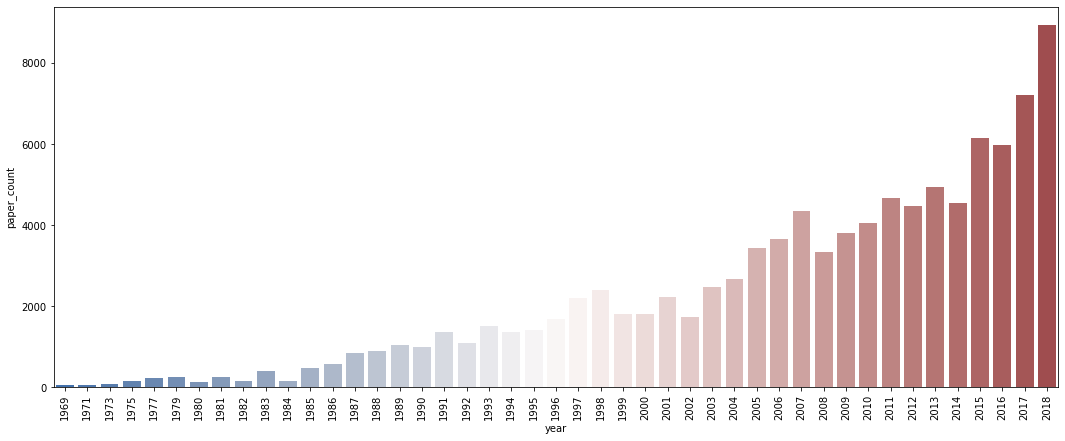

In [318]:
# plot number of papers published per year
f, axes = plt.subplots(figsize=(18, 7), sharex=True)
_ = sns.barplot(x=year_papers2.year, y=year_papers2.paper_count, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(90)

In [319]:
# extract number of papers per year published in nips and icml ( same as A3.3)
mlconf = ['icml', 'nips']
MLpapers2 = new_table[new_table.conference.isin(mlconf)]
MLpapers_per_year2 = MLpapers2[["title","year"]].groupby("year").count()
MLpapers_per_year2 = MLpapers_per_year2.reset_index()
MLpapers_per_year2

,year,title
0,1987,91
1,1988,150
2,1989,237
3,1990,227
4,1991,281
5,1992,204
6,1993,212
7,1994,194
8,1995,238
9,1996,244


In [320]:
MLpapers_per_year2.title.sum()

13595

Text(0, 0.5, 'Number of papers')

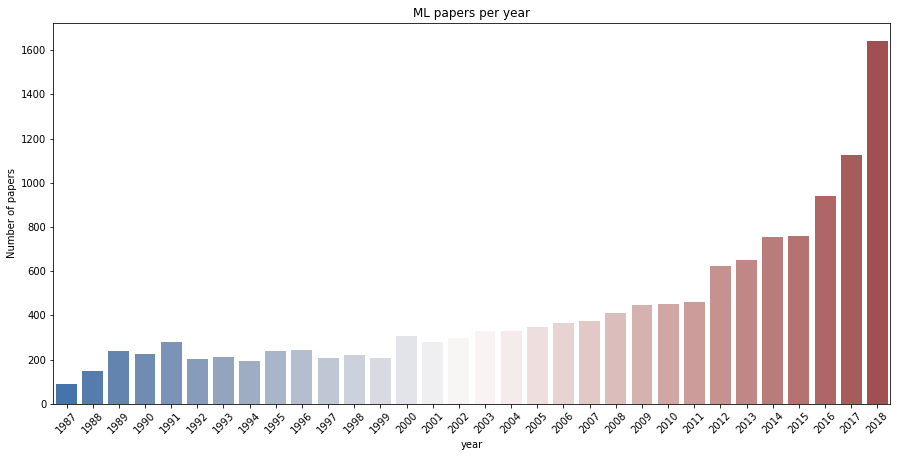

In [321]:
f, axes = plt.subplots(figsize=(15, 7), sharex=True)
_ = sns.barplot(x=MLpapers_per_year2.year, y=MLpapers_per_year2.title, palette="vlag")
for item in _.get_xticklabels():
    item.set_rotation(45)
axes.set_title('ML papers per year')
axes.set_ylabel('Number of papers')

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [322]:
#Group papers by author and retreive the minimum year, maximum year and paper count in seperate dataframes
author_activity_min = table_authors[["authors","year"]].groupby(["authors"]).min(level="year").rename(columns={'year':'min_year'})
author_activity_max = table_authors[["authors","year"]].groupby(["authors"]).max(level="year").rename(columns={'year':'max_year'})
author_activity_count = table_authors[["authors","id"]].groupby(["authors"]).count().rename(columns={'id':'paper_count'})
#Join the three dataframes into one and clear them afterwards
author_activity = author_activity_min.join([author_activity_max,author_activity_count], on=None, how='inner').reset_index()
del author_activity_min, author_activity_max, author_activity_count
#Display the content of the joined dataframe
author_activity

,authors,min_year,max_year,paper_count
0,A Min Tjoa,2009,2010,2
1,A Pouget,1992,1992,1
2,A Sergejew,1993,1993,1
3,A-Chuan Hsueh,1986,1986,1
4,A-Yeon Park,2006,2006,1
...,...,...,...,...
130963,Özlem Çetinoglu,2006,2006,1
130964,Øyvind Raddum Berg,2012,2012,1
130965,Úrsula Hébert-Johnson,2018,2018,1
130966,Ümit Özgüner,1987,1987,1


In [323]:
#add a new field containing the normalized paper count (+1 is added for duration.)
#author_activity["normalized_paper_count"] = author_activity.paper_count/(1 + author_activity.max_year - author_activity.min_year)
author_activity["normalized_paper_count"] = author_activity.apply(lambda x: x.paper_count/(1 + x.max_year - x.min_year), axis=1)
#Display the content of the joined dataframe with normalized paper count
author_activity

,authors,min_year,max_year,paper_count,normalized_paper_count
0,A Min Tjoa,2009,2010,2,1.0
1,A Pouget,1992,1992,1,1.0
2,A Sergejew,1993,1993,1,1.0
3,A-Chuan Hsueh,1986,1986,1,1.0
4,A-Yeon Park,2006,2006,1,1.0
...,...,...,...,...,...
130963,Özlem Çetinoglu,2006,2006,1,1.0
130964,Øyvind Raddum Berg,2012,2012,1,1.0
130965,Úrsula Hébert-Johnson,2018,2018,1,1.0
130966,Ümit Özgüner,1987,1987,1,1.0


,number of occurences
normalized_paper_count,
0.051282,1
0.052632,1
0.054054,3
0.055556,2
0.057143,1
...,...
9.357143,1
9.583333,1
10.333333,1


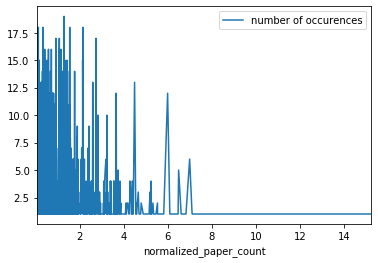

In [340]:
normalized_paper_count_distribution = author_activity[["normalized_paper_count","authors"]].groupby(["normalized_paper_count"]).count().rename(columns={'authors':'number of occurences'})
(normalized_paper_count_distribution[normalized_paper_count_distribution['number of occurences'] <20]).plot()
normalized_paper_count_distribution

## Analysis of distribution
This follows approximately a Gumbel distribution.

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [326]:
# Rank the authors by paper count
author_papers["paper_count-rank"] = author_papers.paper_count.rank(ascending = False, method = 'min')
# Sort the authors by their number of publications in a descending order
naive_score_sorted = author_papers.sort_values("paper_count-rank",ascending=True)
# Display the first 20 elements of the sorted table
naive_score_sorted.head(20)

,authors,paper_count,paper_count-rank
39559,Luc Van Gool,211,1.0
65113,Thomas S. Huang,185,2.0
66479,Toshio Fukuda,163,3.0
44655,Michael I. Jordan,162,4.0
70730,Xiaoou Tang,147,5.0
60359,Shuicheng Yan,146,6.0
63865,Takeo Kanade,145,7.0
37708,Larry S. Davis,142,8.0
66592,Trevor Darrell,142,8.0
67706,Vijay Kumar 0001,141,10.0


## Explanation: 

The ranking based on the number of published papers is not compelling. In fact, usually some researchers have their names listed as authors of papers but they did not contribute in most of the work. Also, some labs choose to publish big papers containing a good part of their work instead of publishing one paper per finding.

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [328]:
#Load the AMiner dataset into a pandas DataFrame
AMiner = pd.read_csv("data/aminer_ai.csv",sep=";")
#Preparation for merging: Rename 'Short Name' column to 'conference'
AMiner.rename(columns={'Short Name':'conference'}, inplace=True)
#Preparation for merging: Put conference elements to lower case
AMiner.conference = AMiner.conference.str.lower()
#Display elements of AMiner
AMiner.head()

,Rank,Conference (Full Name),conference,H5-Index
0,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112
1,2,IEEE Transactions on Pattern Analysis and Mach...,tpami,101
2,3,Expert Systems with Applications,expert syst. appl.,59
3,4,International Journal of Computer Vision,ijcv,58
4,5,IEEE International Conference on Robotics and ...,icra,58


In [329]:
# Merge table_authors and AMiner using columns 'conference' of each DataFrame
table_authors = table_authors.merge(AMiner, on='conference')
# Display merged table
table_authors.head()

,id,authors,year,title,conference,Rank,Conference (Full Name),H5-Index
0,conf/iccv/KunoOO90,Yoshinori Kuno,1990,object recognition using feature search strate...,iccv,6,International Conference on Computer Vision,58
1,conf/iccv/KunoOO90,Yasukazu Okamoto,1990,object recognition using feature search strate...,iccv,6,International Conference on Computer Vision,58
2,conf/iccv/KunoOO90,Satoshi Okada,1990,object recognition using feature search strate...,iccv,6,International Conference on Computer Vision,58
3,conf/iccv/VedulaBRCK99,Sundar Vedula,1999,threedimensional scene flow,iccv,6,International Conference on Computer Vision,58
4,conf/iccv/VedulaBRCK99,Simon Baker,1999,threedimensional scene flow,iccv,6,International Conference on Computer Vision,58


***B2.2***

In [330]:
# Get the sum of the H5-indices for each author 
authors_score = table_authors[['authors','H5-Index']].groupby('authors').sum(level='H5-Index').reset_index()
# Rename the 'H5-Index' column of the new table to 'H5-score'
authors_score.rename(columns={'H5-Index':'score'}, inplace=True)
# Add column with the rank according to the H5 score
authors_score["H5-rank"] = authors_score.score.rank(ascending = False, method = 'min')
# Sort the authors by their number of publications in a descending order 
authors_score_sorted = authors_score.sort_values('H5-rank',ascending=True)
# Display the first 20 elements of the sorted score
authors_score_sorted.head(20)

,authors,score,H5-rank
39558,Luc Van Gool,18100,1.0
65110,Thomas S. Huang,14042,2.0
70727,Xiaoou Tang,13019,3.0
60356,Shuicheng Yan,11660,4.0
66589,Trevor Darrell,11495,5.0
37707,Larry S. Davis,11131,6.0
41036,Marc Pollefeys,10911,7.0
42296,Martial Hebert,10278,8.0
63862,Takeo Kanade,10216,9.0
46904,Mubarak Shah,10112,10.0


***B2.3***

In [331]:
# List the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking
naive_score_list = naive_score_sorted['authors'].head(20).values
authors_score_list = authors_score_sorted['authors'].head(20).values  
difference = [x for x in naive_score_list if x not in authors_score_list]
authors_score_sorted[authors_score_sorted["authors"].isin(difference)]

,authors,score,H5-rank
67703,Vijay Kumar 0001,8218,21.0
55852,Roland Siegwart,8111,23.0
69901,Wolfram Burgard,7642,27.0
17267,Eric P. Xing,7494,31.0
6946,Bernhard Schölkopf,6787,35.0
10960,Christopher D. Manning,5551,54.0
12599,Dan Roth,5213,64.0
12570,Dan Klein,4864,83.0


***B2.4***

In [332]:
#Read list_of_ai_conferences.txt and Transform its lines into list
with open("data/list_of_selected_authors.txt","r") as f : 
    author_list = f.readlines()
# Remove '\n' character from extracted strings
author_list = [line.replace("\n","") for line in author_list]
# Merge paper count with H5 ranking tables
table_rank = authors_score_sorted.merge(naive_score_sorted, on='authors')
table_rank[table_rank.authors.isin(author_list)]

,authors,score,H5-rank,paper_count,paper_count-rank
19165,Charles Freundlich,170,18909.0,2,25846.0
19989,Parag Havaldar,170,18909.0,2,25846.0
40309,Hy Murveit,110,40290.0,11,3069.0
47764,Sebastian Otte,78,47715.0,6,7044.0
55561,Yukihiro Nakamura,58,50252.0,1,46938.0
107003,Mengjie Zhang,16,106940.0,2,25846.0


***B2.5***

In [333]:
# Extract the papers with top 5 best ranked authors according to H5-score.
top_authors = table_authors[table_authors.authors.isin(authors_score_sorted[:5]["authors"])]
# Display the number of papers published per conference for each one of the top 5 authors as well as the H5-index of the conferences.
top_authors[['authors','H5-Index','id']].groupby(['authors','H5-Index']).count().rename(columns={'id':'papers published'}).sort_index(ascending=False)

papers published
authors          H5-Index                  
 Xiaoou Tang     112                     89
                 58                      38
                 56                       3
                 51                       5
                 44                       7
                 35                       3
                 10                       1
                 1                        1
 Trevor Darrell  112                     69
                 58                      34
                 56                       9
                 51                      20
                 45                       3
                 44                       2
                 35                       1
                 10                       1
                 1                        3
 Thomas S. Huang 112                     98
                 58                      34
                 56                       1
                 51                       7
                 44                       8
                 35                       7
                 10                       6
                 1                       24
 Shuicheng Yan   112                     73
                 58                      29
                 56                       5
                 51                      12
                 44                      13
                 35                       9
                 10                       2
                 1                        3
 Luc Van Gool    112                    130
                 58                      54
                 56                       1
                 51                       1
                 44                       3
                 10                      16
                 4                        1
                 1                        5

## Analysis
This shows us that most of the papers from the top ranked authors are published in conferences with highest H5-indices. This shows a limitation of the used scoring system as a paper published in a top ranked conference will get a much higher score than several papers published in a low ranked conference.

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [334]:
# Merge table_rank with normalized paper count table 
table_rank = table_rank.merge(author_activity[['authors','normalized_paper_count']], on = 'authors', how = 'left')
# Calculate new normalized score as H5-score * normalized_paper_count, rounding floats for display
table_rank['normalized_score'] = round( table_rank.apply(lambda x: x['normalized_paper_count'] * x['score'],axis=1),2)
table_rank['normalized_paper_count'] = round(table_rank['normalized_paper_count'],2)
table_rank

,authors,score,H5-rank,paper_count,paper_count-rank,normalized_paper_count,normalized_score
0,Luc Van Gool,18100,1.0,211,1.0,7.28,131693.10
1,Thomas S. Huang,14042,2.0,185,2.0,5.00,70210.00
2,Xiaoou Tang,13019,3.0,147,5.0,9.19,119612.06
3,Shuicheng Yan,11660,4.0,146,6.0,8.59,100138.82
4,Trevor Darrell,11495,5.0,142,8.0,4.73,54409.67
...,...,...,...,...,...,...,...
130963,Samuel A. Anthony,1,129587.0,1,46938.0,1.00,1.00
130964,Sourabh Niyogi,1,129587.0,1,46938.0,1.00,1.00
130965,Patricia E. Solomon,1,129587.0,1,46938.0,1.00,1.00
130966,Alex W. Stedmon,1,129587.0,1,46938.0,1.00,1.00


In [335]:
# Rank the authors by normalized_score
table_rank["normalized-rank"] = table_rank.normalized_score.rank(ascending = False, method = 'min')
# Sort the authors by their rank in an ascending order
table_rank_sorted = table_rank.sort_values("normalized-rank",ascending=True)
# Display the first 20 elements of the sorted table
table_rank_sorted.head(20)

,authors,score,H5-rank,paper_count,paper_count-rank,normalized_paper_count,normalized_score,normalized-rank
0,Luc Van Gool,18100,1.0,211,1.0,7.28,131693.10,1.0
2,Xiaoou Tang,13019,3.0,147,5.0,9.19,119612.06,2.0
3,Shuicheng Yan,11660,4.0,146,6.0,8.59,100138.82,3.0
6,Marc Pollefeys,10911,7.0,130,16.0,6.50,70921.50,4.0
1,Thomas S. Huang,14042,2.0,185,2.0,5.00,70210.00,5.0
30,Eric P. Xing,7494,31.0,131,15.0,9.36,70122.43,6.0
14,Xiaogang Wang,9280,15.0,103,39.0,6.44,59740.00,7.0
52,Dacheng Tao,5744,53.0,115,23.0,9.58,55046.67,8.0
167,Sergey Levine,3568,168.0,61,136.0,15.25,54412.00,9.0
4,Trevor Darrell,11495,5.0,142,8.0,4.73,54409.67,10.0


## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [336]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [341]:
words_symbolic = ['logic', 'planning', 'control']
# Put titles to lower case and search for 'symbolic' keywords in the titles
symbolic = new_table[new_table.title.apply(lowercase_all).str.contains('|'.join(words_symbolic))]
# Display extracted DataFrame
symbolic.head()

,id,authors,year,title,conference
70,conf/iccv/KinoshitaL98,"['Keisuke Kinoshita', 'Michael Lindenbaum']",1998,robotic control partial visual information,iccv
132,conf/iccv/MartinFTM01,"['David R. Martin 0001', 'Charless C. Fowlkes'...",2001,database human segmented natural images applic...,iccv
332,conf/iccv/VemuriG98,"['Baba C. Vemuri', 'Yanlin Guo']",1998,snake pedals geometric models physicsbased con...,iccv
370,conf/iccv/LobatonVAB11,"['Edgar J. Lobaton', 'Ramanarayan Vasudevan', ...",2011,robust topological features deformation invari...,iccv
375,conf/iccv/WatanabeHYNY01,"['Hiroki Watanabe', 'Hitoshi Hongo', 'Mamoru Y...",2001,control home appliances using face hand sign r...,iccv


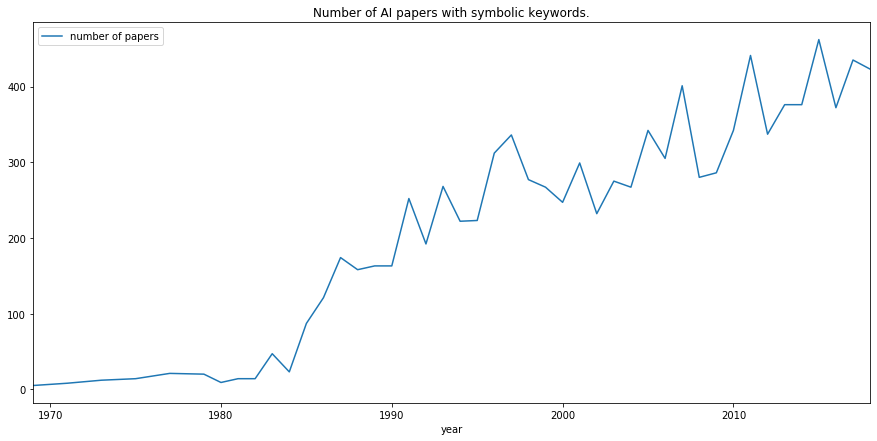

In [342]:
# Count the number of papers per year with 'symbolic' keywords.
nb_papers_symbolic = symbolic[["id","year"]].groupby("year").count()
# Plot the Number of AI papers with symbolic keywords.
nb_papers_symbolic.rename(columns={'id':'number of papers'}).plot(title="Number of AI papers with symbolic keywords.",figsize=(15,7))

In [344]:
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
# Put titles to lower case and search for 'connectionist' keywords in the titles
connectionist = new_table[new_table.title.apply(lowercase_all).str.contains('|'.join(words_connectionist))]
# Display the extracted DataFrame
connectionist.head()

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990,object recognition using feature search strate...,iccv
13,conf/iccv/LiuW01,"['Chengjun Liu', 'Harry Wechsler']",2001,gabor feature classifier face recognition,iccv
27,conf/iccv/LiDSX15,"['Yongbo Li', 'Weisheng Dong', 'Guangming Shi'...",2015,learning parametric distributions image superr...,iccv
30,conf/iccv/GaoHLY09,"['Jizhou Gao', 'Yin Hu', 'Jinze Liu', 'Ruigang...",2009,unsupervised learning highorder structural sem...,iccv
31,conf/iccv/BinsD01,"['José Bins', 'Bruce A. Draper']",2001,feature selection huge feature sets,iccv


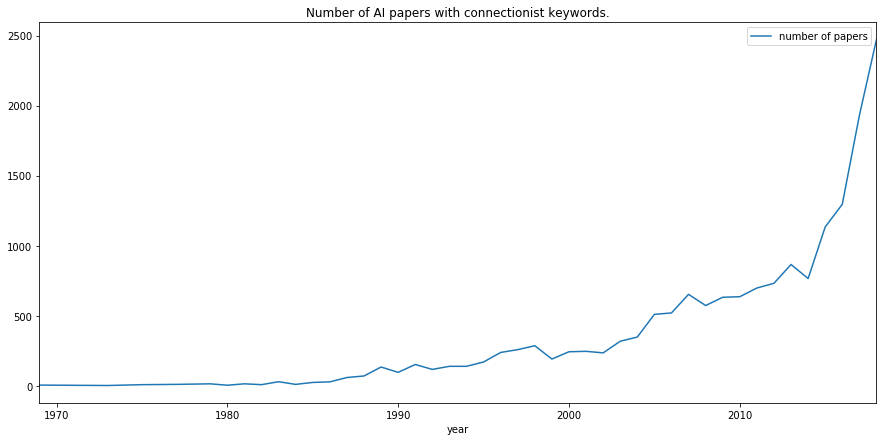

In [345]:
# Count the number of papers per year with 'connectionist' keywords
nb_papers_connectionist = connectionist[["id","year"]].groupby("year").count()
# Plot the Number of AI papers with 'connectionist' keywords
nb_papers_connectionist.rename(columns={'id':'number of papers'}).plot(title="Number of AI papers with connectionist keywords.",figsize=(15,7))

## Analysis Part 1:

We see from the first plot that the number of symbolic AI papers papers went increasing linearly to reach a maximum value these last years of more than 400 papers.

We see from the second plot that the number of connectionist AI papers started increasing slowly, linearly with a small slope until around 2005 when it started increasing exponentially going from 500 to 2500 in less than 15 years.

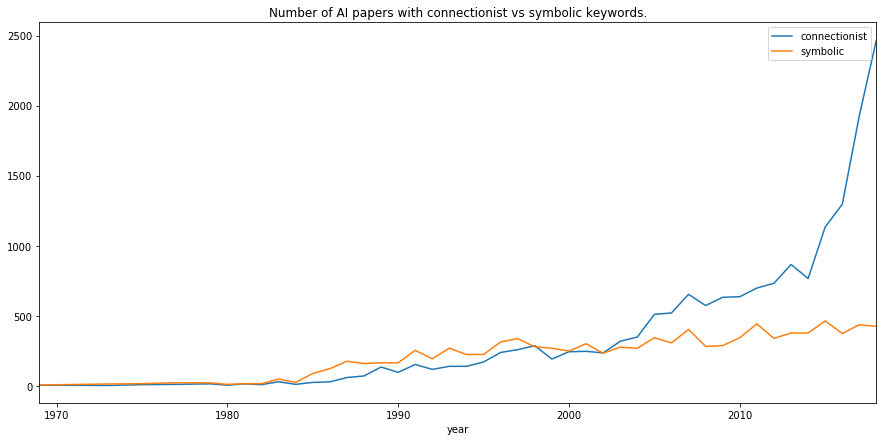

In [346]:
# Plot the Number of AI papers with connectionist vs symbolic keywords in the same figure
ax = nb_papers_connectionist.rename(columns={'id':'connectionist'}).plot(title="Number of AI papers with connectionist vs symbolic keywords.",figsize=(15,7))
nb_papers_symbolic.rename(columns={'id':'symbolic'}).plot(ax = ax)

## Analysis Part 2:

From the 3 plots above we can see that the publications of AI papers for both approaches started together in year 1969 and the number of publications got increasing by time with a high correlation between the two, until the start of the 2000's where the number of symbolic AI papers kept increasing slowly (linearly) whereas the number of connectionist AI papers surpassed the number of papers for the symbolic approach and started increasing exponentially around the year 2009.

Observing that nowadays the number of connectionist AI papers is nearly five times more the number of symbolic AI papers and comparing their evolution functions, we can conclude that the connectionist approach is becoming more and more popular and more papers are being published in that matter.

This popularity may be due to recent success stories of connectionist AI and mostly deep learning achievements (e.g Google using deep learning) , but also to media hype.